<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#My-NLP-library-toolkits:-Part-8" data-toc-modified-id="My-NLP-library-toolkits:-Part-8-1">My NLP library toolkits: Part 8</a></span><ul class="toc-item"><li><span><a href="#0.-Loading-the-dataset" data-toc-modified-id="0.-Loading-the-dataset-1.1">0. Loading the dataset</a></span></li><li><span><a href="#16.-Syntactic-trees" data-toc-modified-id="16.-Syntactic-trees-1.2">16. Syntactic trees</a></span><ul class="toc-item"><li><span><a href="#16.1-Treebank" data-toc-modified-id="16.1-Treebank-1.2.1">16.1 Treebank</a></span></li><li><span><a href="#16.2-Dependency-tree" data-toc-modified-id="16.2-Dependency-tree-1.2.2">16.2 Dependency tree</a></span></li></ul></li><li><span><a href="#17.-Lexical-semantic-features:-dictionary-resources" data-toc-modified-id="17.-Lexical-semantic-features:-dictionary-resources-1.3">17. Lexical semantic features: dictionary resources</a></span><ul class="toc-item"><li><span><a href="#17.1-WordNet" data-toc-modified-id="17.1-WordNet-1.3.1">17.1 WordNet</a></span></li><li><span><a href="#17.2-FrameNet" data-toc-modified-id="17.2-FrameNet-1.3.2">17.2 FrameNet</a></span></li><li><span><a href="#17.3-VerbNet" data-toc-modified-id="17.3-VerbNet-1.3.3">17.3 VerbNet</a></span></li></ul></li></ul></li></ul></div>

# My NLP library toolkits: Part 8

**Tao Lin**

This part is about some syntactic and semantic analyses
These features are not intensively used in industry
but are useful for some NLU tasks, such as virtual assistants.

16. Syntactic trees
17. Lexical semantic features

----------------

## 0. Loading the dataset

In [1]:
# open the file and read the CNN-dm data (originally for summarization tasks)
source_lines = open('/Users/taolin/Desktop/udacity/data/train.txt.src' , encoding='utf-8').\
read().strip().split('\n')
source_lines = source_lines
target_lines = open('/Users/taolin/Desktop/udacity/data/train.txt.tgt.tagged' , encoding='utf-8').\
read().replace("</t>",'').replace("<t>",'').strip('').split('\n')
target_lines = target_lines

sample_data = target_lines[0:1000]
print("The raw input: \n\n" + sample_data[45])

The raw input: 

 orme , tennessee , has running water from 6 p.m. to 9 p.m.   town 's spring ran dry in midst of southeast drought .   donated water is trucked in from alabama .   completion of pipeline will solve problem for good . 


## 16. Syntactic trees
### 16.1 Treebank

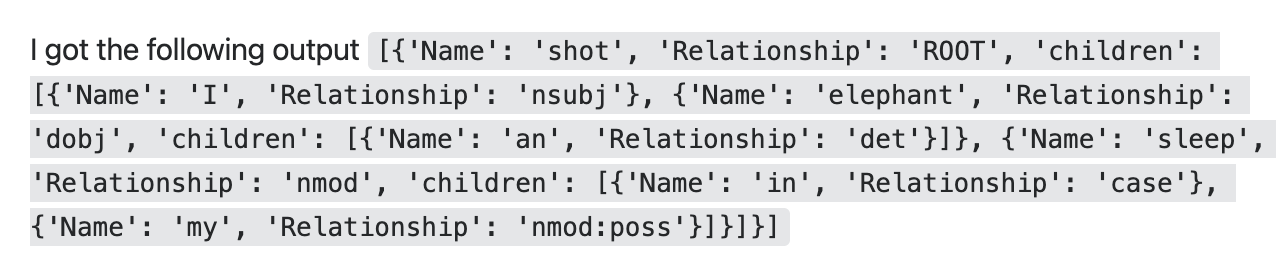

In [2]:
# use pycorenlp: https://stackoverflow.com/questions/32879532/stanford-nlp-for-python

### 16.2 Dependency tree

In [3]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Autonomous cars shift insurance liability toward manufacturers")
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

Autonomous amod cars NOUN []
cars nsubj shift VERB [Autonomous]
shift ROOT shift VERB [cars, liability]
insurance compound liability NOUN []
liability dobj shift VERB [insurance, toward]
toward prep liability NOUN [manufacturers]
manufacturers pobj toward ADP []


In [4]:
# visualize the tree
from spacy import displacy

displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

## 17. Lexical semantic features: dictionary resources
### 17.1 WordNet

In [5]:
from nltk.corpus import wordnet
from nltk.corpus import wordnet as wn

wn.synsets('important')

[Synset('important.a.01'),
 Synset('significant.a.01'),
 Synset('crucial.a.01'),
 Synset('authoritative.s.01'),
 Synset('important.s.05')]

In [6]:
# hyponyms and hypernyms
# hyper: is a kind of ...
conf = wn.synset('weapon.n.01')
conf.hypernyms()

[Synset('instrument.n.01')]

In [7]:
# hypo: has examples like ...
conf.hyponyms()

[Synset('bow.n.04'),
 Synset('bow_and_arrow.n.01'),
 Synset('brass_knucks.n.01'),
 Synset('fire_ship.n.01'),
 Synset('flamethrower.n.01'),
 Synset('greek_fire.n.01'),
 Synset('gun.n.01'),
 Synset('knife.n.02'),
 Synset('light_arm.n.01'),
 Synset('missile.n.01'),
 Synset('pike.n.04'),
 Synset('projectile.n.01'),
 Synset('slasher.n.02'),
 Synset('sling.n.04'),
 Synset('spear.n.01'),
 Synset('stun_gun.n.01'),
 Synset('sword.n.01'),
 Synset('tomahawk.n.01'),
 Synset('weapon_of_mass_destruction.n.01')]

### 17.2 FrameNet

In [8]:
from pprint import pprint
from nltk.corpus import framenet as fn
#nltk.download('framenet_v17')

# check the frame number
pprint(fn.lus(r'(?i)a little'))

[<lu ID=14744 name=a little bit.adv>, <lu ID=14743 name=a little.adv>, ...]


In [9]:
fn.lu(253).name

'anticipate.v'

### 17.3 VerbNet

In [10]:
import nltk
from nltk.corpus import verbnet
#nltk.download('verbnet')

# return a class of verb
verbnet.classids('give')

['give-13.1-1']